Data Cleaning

In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import statistics as stat

#importing the dataset
data=pd.read_csv('C:\\Users\\marcella\\Downloads\\Termpaper.csv')

##data cleaning---------------------------------
#check for the information
data.info()

#check for the missing values 
np.sum(data.isna())


#exploring variable--------------------------
#drop missing values
data=data.dropna(how='all')
#sex
np.sum(data['Sex'].isna())
data['Sex'].unique
data['Sex']=data['Sex'].astype(int)
data['Sex']=data['Sex'].astype('category')
data['Sex'].value_counts()

#Marital status
data['Marital Status']=data['Marital Status'].replace({'I':1,'3_':3})
data['Marital Status']=data['Marital Status'].replace({'1':1,'3':3})
data['Marital Status']=data['Marital Status'].astype('category')
data['Marital Status'].unique
data['Marital Status'].value_counts()

#X
data['X'].unique
data['X']=data['X'].astype(int)
data['X'].value_counts()

#Age
data['Age'].unique
data['Age']=data['Age'].astype(int)
data['Age'].value_counts()

#Occupation
data['Occupation'].unique
data['Occupation']=data['Occupation'].astype(int)
data['Occupation']=data['Occupation'].astype('category')
data['Occupation'].value_counts()

#Education (Years
data['Education (Years)'].unique
data['Education (Years)']=data['Education (Years)'].replace({'..16':16,'16 .':16,'16':16})
data['Education (Years)']=data['Education (Years)'].astype(int)
data['Education (Years)'].value_counts()

#Distance (Miles)
data['Distance (Miles)'].unique
data['Distance (Miles)']=data['Distance (Miles)'].replace({'. 10':10,'. 8':8,'. 18':18,',11':11,
                                                           ' 24':24,'10':10,'8':8,'18':18,'11':11,"'24 ":24})
data['Distance (Miles)']=data['Distance (Miles)'].astype(int)
data['Distance (Miles)'].value_counts()

#Years Current Employer
data['Years Current Employer'].unique
data['Years Current Employer'].value_counts()
data['Years Current Employer']=data['Years Current Employer'].astype(int)
#Annual Income ('000)
data["Annual Income ('000)"].unique
data["Annual Income ('000)"].value_counts()

#Residence Size
data['Residence Size'].unique
data['Residence Size']=data['Residence Size'].astype(int)
data['Residence Size'].value_counts()

#Family Size
data['Family Size'].unique
data['Family Size']=data['Family Size'].astype(int)
data['Family Size']=data['Family Size'].astype('category')
data['Family Size'].value_counts()

data.info()
data=data.rename(columns={"Annual Income ('000)":"Annual Income"})
#change the annual income to 1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   X                       1000 non-null   float64
 1   Sex                     1000 non-null   float64
 2   Marital Status          1000 non-null   object 
 3   Age                     1000 non-null   float64
 4   Occupation              1000 non-null   float64
 5   Education (Years)       1000 non-null   object 
 6   Distance (Miles)        1000 non-null   object 
 7   Years Current Employer  1000 non-null   float64
 8   Annual Income ('000)    1000 non-null   float64
 9   Residence Size          1000 non-null   float64
 10  Family Size             1000 non-null   float64
dtypes: float64(8), object(3)
memory usage: 86.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype

C:\Users\marcella\Documents\PYTHON1\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Descriptive Statistics

In [124]:
#mean
means=pd.DataFrame({'age':[stat.mean(data['Age'])],'education':[stat.mean(data['Education (Years)'])],
              'distance':[stat.mean(data['Distance (Miles)'])],'Years Current Employer':[stat.mean(data['Years Current Employer'])],
             "Annual Income":[stat.mean(data["Annual Income"])],'Residence Size':[stat.mean(data['Residence Size'])]})
#starndard deviation
std=pd.DataFrame({'age':[stat.stdev(data['Age'])],'education':[stat.stdev(data['Education (Years)'])],
              'distance':[stat.stdev(data['Distance (Miles)'])],'Years Current Employer':[stat.stdev(data['Years Current Employer'])],
             "Annual Income":[stat.stdev(data["Annual Income"])],'Residence Size':[stat.stdev(data['Residence Size'])]})
#maximum 
maximum=pd.DataFrame({'age':[max(data['Age'])],'education':[max(data['Education (Years)'])],
              'distance':[max(data['Distance (Miles)'])],'Years Current Employer':[max(data['Years Current Employer'])],
             "Annual Income":[max(data["Annual Income"])],'Residence Size':[max(data['Residence Size'])]})
#minimum
minimum=pd.DataFrame({'age':[min(data['Age'])],'education':[min(data['Education (Years)'])],
              'distance':[min(data['Distance (Miles)'])],'Years Current Employer':[min(data['Years Current Employer'])],
             "Annual Income":[min(data["Annual Income"])],'Residence Size':[min(data['Residence Size'])]})
#joining the data frames
descriptive=pd.concat([means,std,maximum,minimum],ignore_index=True)
#renaming the indexes
my_index=['mean','std','max','min']
descriptive.index=my_index
descriptive


,age,education,distance,Years Current Employer,Annual Income,Residence Size
mean,35.994000,14.297000,18.957000,10.188000,24.150000,17.907000
std,11.144333,1.965873,9.031319,8.058511,10.185443,10.358941
max,60.000000,18.000000,35.000000,33.000000,60.000000,70.000000
min,18.000000,12.000000,1.000000,1.000000,10.000000,4.000000


# Data Exploration

<Axes: >

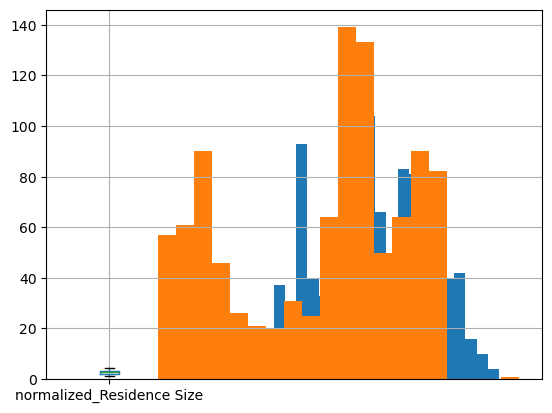

In [125]:
from matplotlib import pyplot as plt
data
#data exploration------------------------------
#plotting(boxplot) and distributio(histogram)
#for categorical fillnas with mode()
#boxplot
data=data.drop(columns='X')
#pyplot.boxplot(data['Age']) #no outlier for age
#pyplot.boxplot(data['Education (Years)']) #no outliers for education
#data.boxplot(column="Age")
#data.hist(column="Age")      #its symmetrical
#data.boxplot(column='Education (Years)')  #no outliers for education
#data.hist(column='Education (Years)')  

#data.boxplot(column="Distance (Miles)") #no outliers in Distance (Miles)"

#data.boxplot(column="Residence Size")     #has one outlier 

data.boxplot(column="Annual Income") #has 4 outliers

#data.hist(column="Age")    #use hist to check distri for numerical variable
#data["Age"].hist(bins=20)
#data["Education (Years)"].hist(bins=20)    #its symmetrical about the mean
#data["Distance (Miles)"].hist(bins=20)      #its skewed distributin,  we have to nomalized

#data["Residence Size"].hist(bins=20) #its skewed distribution, we have to normalize
data["Annual Income"].hist(bins=20)   #its skewed distribution ,we have to normalize

#normalization of the Annual income using numpy   log() 
data["normalized_Annual_income"]=np.log(data["Annual Income"])
data["normalized_Annual_income"]

data["normalized_Annual_income"].hist(bins=20)
#data.boxplot(column="normalized_Annual_income")   # normilization  of variables helps in removing outliers
data["normalized_Residence Size"]=np.log(data["Residence Size"])

data["normalized_Residence Size"].hist(bins=20)      
data.boxplot(column="normalized_Residence Size")    #normalization of variables helps in removing outliers 



# Descriptive analysis

In [173]:
def apply(n):
    return(n*1000)
data["normalized_Annual_income"]=apply(data["normalized_Annual_income"])
data                                      

,Sex,Marital Status,Age,Occupation,Education (Years),Distance (Miles),Years Current Employer,Annual Income,Residence Size,Family Size,normalized_Annual_income,normalized_Residence Size
0,1,2,29,4,14,12,5,24.0,26,4,3.178054e+09,3.258097
1,1,2,48,1,16,34,10,27.0,22,4,3.295837e+09,3.091042
2,1,2,41,5,12,12,11,16.0,20,4,2.772589e+09,2.995732
3,1,2,54,4,14,18,20,23.0,20,3,3.135494e+09,2.995732
4,1,2,44,4,12,5,20,21.0,19,3,3.044522e+09,2.944439
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,51,2,14,5,20,20.0,19,3,2.995732e+09,2.944439
996,1,2,50,3,12,35,19,27.0,22,3,3.295837e+09,3.091042
997,1,3,19,5,12,15,1,10.0,4,1,2.302585e+09,1.386294
998,1,1,28,3,16,11,1,36.0,10,1,3.583519e+09,2.302585


In [ ]:
 # This is analysis that focuses majorly on numerical variables
# we talk of the staff like:
# mean 
# standard deviation
# Quartile
#comparing more than two means we use (z-test-when population is known,t-test-population not known)
#comparing variance we use test statistics of chi-square test
#types of anova
#CRD 1 way anova
#RCBD 2 way anova
#latin square 3 way anova
#greeko latin square design 4 way anova
#MEAN ANALYSIS
#VISUALIZATION
#COMBINED LINE GRAPH

Text(0, 0.5, 'Normalized')

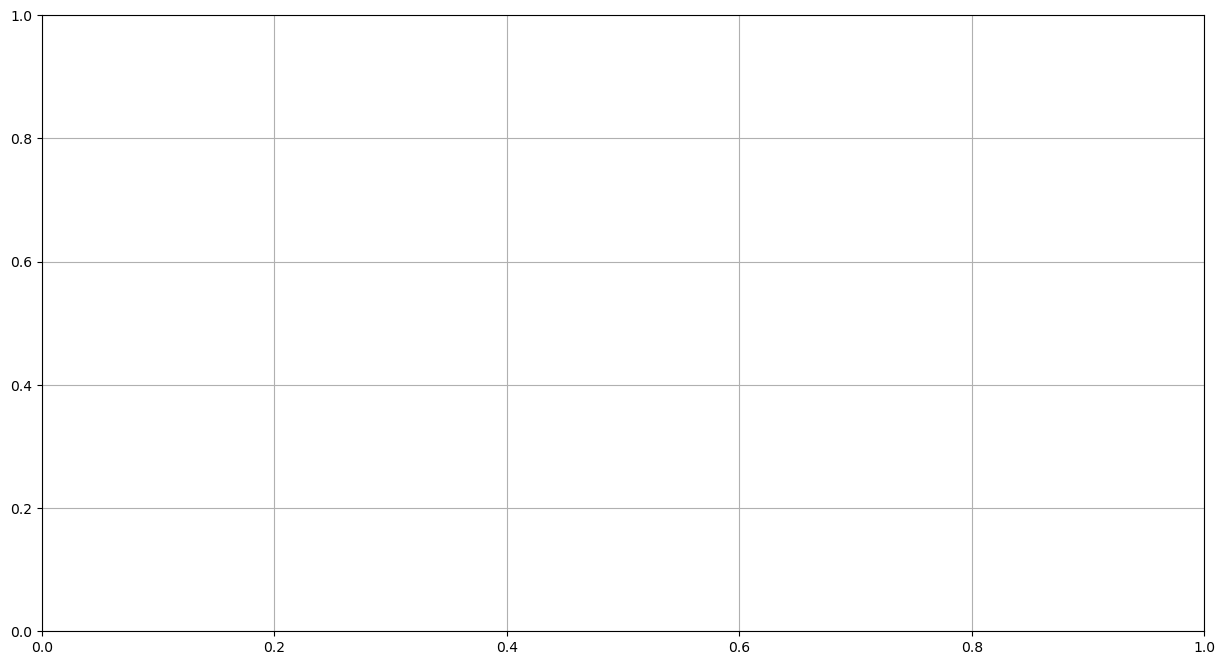

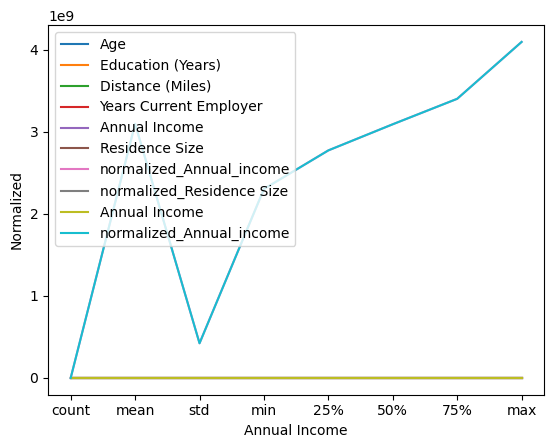

In [187]:
from matplotlib import pyplot
descriptive1=data.describe()
descriptive_Analysis=pd.DataFrame(descriptive1)
plt.figure(figsize=(15,8))
plt.grid()
import statistics as st
Age_mean=st.mean(data["Age"])
#plot("Age")
#Age_mean=descriptive_Analysis.iloc[1:1]

#Age_mean=descriptive_analysis
#summary["Age"].plot()
#summary["Distance (Miles)"].plot()
descriptive_Analysis.plot()
descriptive_Analysis["Annual Income"].plot()
descriptive_Analysis["normalized_Annual_income"].plot()
pyplot.legend()

#comparative
pyplot.xlabel("Annual Income")
pyplot.ylabel("Normalized")



#descriptive_Analysis.xlabel
#pyplot.savefig("C:/Users/marcella/OneDrive/Pictures(1)/descriptive anaysis.png")



